<a href="https://colab.research.google.com/github/adalves-ufabc/2020.QS-PLN/blob/main/2020_QS_PLN_Notebook_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2020.QS]**
Prof. Alexandre Donizeti Alves

## **Capítulo 01 - Introdução ao Processamento de Linguagem Natural]**

[Livro: *The Natural Language Processing Workshop*]

### https://github.com/PacktWorkshops/The-Natural-Language-Processing-Workshop
---



### **Exemplo 1.01 - Analítica de Texto [*Text Analytics*]**

Neste exercício, realizaremos algumas análises de texto básicas em alguns dados de texto fornecidos, incluindo a pesquisa de uma palavra específica, a localização do índice de uma palavra e a localização de uma palavra em uma determinada posição. Siga estas etapas para implementar este exercício usando a seguinte frase:

In [9]:
sentence = 'The quick brown fox jumps over the lazy dog'
sentence

'The quick brown fox jumps over the lazy dog'

In [10]:
# verifica se uma determinada palavra (word) pertence a uma sentenca (sentence)
def find_word(word, sentence):
    return word in sentence

# verifica se a palavra 'quick' pertence a essa sentenca    
find_word('quick', sentence)

True

In [11]:
# retorna o valor do indice de uma palava (word) em um texto (text)
def get_index(word, text):
    return text.index(word)

# retorna o valor do indice da palavra 'fox' na sentenca   
get_index('fox', sentence)

16

In [12]:
# a posicao da palavra 'lazy' na sentenca
# a primeira palavra 'The' esta na posicao de indice 0
get_index('lazy', sentence.split())

7

In [13]:
# retorna a palavra que esta na posicao de indice 'rank' no texto (text)
def get_word(text,rank):
    return text.split()[rank]
    
# retorna a terceira(indice 2) palavra da sentenca
get_word(sentence,2)

'brown'

In [14]:
# retorna a terceira (indice 2) palavra da sentenca na ordem inversa
get_word(sentence,2)[::-1]

'nworb'

In [15]:
# concatena a primeira e a ultima palavra do texto
def concat_words(text):
    """
    This method will concat first and last 
    words of given text
    """
    words = text.split()
    first_word = words[0]
    last_word = words[len(words)-1]
    return first_word + last_word

# concatena a primeira (The) e a ultima (dog) palavra da sentenca
concat_words(sentence)

'Thedog'

In [17]:
def get_even_position_words(text):
    words = text.split()
    return [words[i] for i in range(len(words)) if i%2 == 0]
 
# retorna as palavras da sentenca em posicoes pares 
get_even_position_words(sentence)

['The', 'brown', 'jumps', 'the', 'dog']

In [18]:
def get_last_n_letters(text, n):
    return text[-n:]

# retorna as ultimas tres letras da sentenca   
get_last_n_letters(sentence,3)

'dog'

In [19]:
def get_reverse(text):
    return text[::-1]
    
# retorna o texto da sentenca na ordem inversa    
get_reverse(sentence)

'god yzal eht revo spmuj xof nworb kciuq ehT'

In [16]:
def get_word_reverse(text):
    words = text.split()
    return ' '.join([word[::-1] for word in words])

# retorna cada palavra da sentenca na ordem inversa, mantendo sua sequencia
get_word_reverse(sentence)

'ehT kciuq nworb xof spmuj revo eht yzal god'

## **Tarefas de Pré-processamento em PLN**

Para realizar essas tarefas, usaremos uma biblioteca Python chamada **NLTK** (Natural Language Toolkit). **NLTK** é uma ferramenta de código aberto poderosa que fornece um conjunto de métodos e algoritmos para realizar uma ampla gama de tarefas de PLN, incluindo *tokenization* (tokenização), *Parts-of-Speech tagging* (*PoS Tagging*), *stemming*, *lemmatization* (lematização) e muito mais.

**Tokenização**

---




A **tokenização** se refere ao procedimento de dividir uma frase em suas partes constituintes - as palavras e a pontuação das quais ela é composta. 

É diferente de simplesmente dividir a frase em espaços em branco e, em vez disso, divide a frase em palavras constituintes, números (se houver) e pontuação, que nem sempre podem ser separados por espaços em branco. 

Por exemplo, considere esta frase: "I am reading a book." Aqui, nossa tarefa é extrair palavras / tokens desta frase. Depois de passar essa frase para um programa de tokenização, as palavras / tokens extraídos seriam "I", "am", "reading", "a", "book" e "." - este exemplo extrai um token de cada vez. Esses tokens são chamados de **unigramas**.


O NLTK fornece um método chamado **`word_tokenize()`**, que transforma o texto em palavras (tokens). Na verdade, ele separa o texto em palavras diferentes com base na pontuação e espaços entre as palavras.

### **Exemplo 1.02 - Tokenização [*Tokenization*]**

In [27]:
from nltk import word_tokenize,download
download(['punkt','averaged_perceptron_tagger','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def get_tokens(sentence):
    words = word_tokenize(sentence)
    return words

print(get_tokens("I am reading NLP Fundamentals."))

['I', 'am', 'reading', 'NLP', 'Fundamentals', '.']


**PoS Tagging**

---


Um etiquetador é responsável pelo processo de definição da classe gramatical das palavras, de acordo com as funções sintáticas.  

O processo de classificação das palavras em suas classe gramaticais (a quais chamamos de ***Part-of-Speech*** ou ***POS***) e rotulação são conhecidas como *Part-of-Speech tagging*, *POS-tagging*, ou simplismente *tagging*.

Em PLN, o termo PoS se refere a classes gramaticais. **PoS Tagging** se refere ao processo de etiquetação de palavras dentro de frases com seus respectivos PoS. Extraímos os PoS de tokens que constituem uma frase para que possamos filtrar os PoS de interesse e analisá-los. 

Por exemplo, se olharmos para a frase "*The sky is blue*", obteremos quatro tokens com a ajuda da **tokenização**: "*The*", "*sky*", "*is*" e "*blue*". Agora, usando um *POS tagger*, marcamos o PoS para cada palavra/token. Isso terá a seguinte aparência:

> [('The', 'DT'), ('sky', 'NN'), ('is', 'VBZ'), ('blue', 'JJ')]

O formato anterior é uma saída do método **`pos_tag()`** da biblioteca NLTK. É uma lista de tuplas em que cada tupla consiste na palavra seguida pela PoS tag:


> **DT** = Determiner

> **NN** = Noun, common, singular or mass

> **VBZ** = Verb, present tense, third-person singular

> **JJ** = Adjective

Para obter a lista completa de PoS tags em NLTK, você pode consultar https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/.

**PoS tagging** é realizada usando diferentes técnicas, uma das quais é uma abordagem baseada em regras que constrói uma lista para atribuir uma possível tag para cada palavra.

**PoS tagging** encontra aplicação em muitas tarefas de PLN, incluindo desambiguação de sentido de palavra, classificação, reconhecimento de entidade nomeada (***NER - Named Entity Recognition***) e resolução de correferência.

Por exemplo, considere o uso da palavra "planted" nestas duas frases:

> "*He planted the evidence for the case*" e "*He planted five trees in the garden*"

Podemos ver que a POS tag "planted" claramente nos ajudaria a diferenciar os diferentes significados das frases.

### **Exemplo 1.03 - *PoS Tagging***

In [29]:
from nltk import word_tokenize, pos_tag

In [30]:
def get_tokens(sentence):
    words = word_tokenize(sentence)
    return words

In [31]:
words  = get_tokens("I am reading NLP Fundamentals")
print(words)

['I', 'am', 'reading', 'NLP', 'Fundamentals']


In [32]:
def get_pos(words):
    return pos_tag(words)
    
get_pos(words)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('reading', 'VBG'),
 ('NLP', 'NNP'),
 ('Fundamentals', 'NNS')]

Na saída anterior, podemos ver que para cada token, um PoS foi alocado.

>**PRP** significa pronome pessoal

> **VBP** significa verbo no presente

> **VGB** significa verbo no gerúndio

> **NNP** significa substantivo próprio singular 

> **NNS** significa substantivo plural


**Remoção de *stop words***

---

As palavras irrelevantes (***stop words***) são as palavras que ocorrem com mais frequência em qualquer idioma e são usadas apenas para apoiar a construção de frases e não contribuem em nada para a semântica de uma frase.

Portanto, podemos remover essas palavras de qualquer texto antes de um processo de PLL, pois elas ocorrem com muita frequência e sua presença não tem muito impacto no sentido de uma frase. Removê-las nos ajudará a limpar nossos dados, tornando sua análise muito mais eficiente. Exemplos de ***stop words*** (em inglês) incluem "*a*", "*am*", "*and*", "*the*", "*in*", "*of*", entre outras.

### **Exemplo 1.04 - Remoção de *stop words***

In [ ]:
from nltk import download
download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
sentence = "I am learning Python. It is one of the most popular programming languages"
sentence_words = word_tokenize(sentence)

print(sentence_words)

['I', 'am', 'learning', 'Python', '.', 'It', 'is', 'one', 'of', 'the', 'most', 'popular', 'programming', 'languages']


In [ ]:
def remove_stop_words(sentence, stop_words):
    return ' '.join([word for word in sentence if word not in stop_words])

print(remove_stop_words(sentence_words, stop_words))

I am learning Python . It is one of the most popular programming languages


In [ ]:
stop_words.extend(['I','It', 'one'])
print(remove_stop_words(sentence_words,stop_words))

am learning . is of the most popular programming languages


**Normalização de Textos**

---

Existem algumas palavras que são soletradas, pronunciadas e representadas de maneira diferente - por exemplo, palavras como US e United States. Embora sejam diferentes, eles se referem à mesma coisa. 

Existem também diferentes formas de palavras que precisam ser convertidas em formas básicas. Por exemplo, palavras como "*does*" e "*doing*", quando convertidas para sua forma básica, tornam-se "*do*". 

A **normalização de textos** é um processo em que diferentes variações de texto são convertidas em um formato padrão. Precisamos realizar a normalização do texto, pois há algumas palavras que podem significar a mesma coisa. Existem várias maneiras de normalizar o texto, como *spelling correction* (correção ortográfica), *stemming* e *lemmatization* (lematização).

### **Exercício 1.05 - Normalização de Textos**

In [ ]:
sentence = "I visited the US from the UK on 22-10-18"

In [ ]:
def normalize(text):
    return text.replace("US", "United States").replace("UK", 
        "United Kingdom").replace("-18", "-2018")

In [ ]:
normalized_sentence = normalize(sentence)
print(normalized_sentence)

I visited the United States from the United Kingdom on 22-10-2018


In [ ]:
normalized_sentence = normalize('The US and the UK are two superpowers')
print(normalized_sentence)

The United States and the United Kingdom are two superpowers


**Correção Ortográfica (*Spelling Correction*)**

---

A **correção ortográfica** é uma das tarefas mais importantes em qualquer projeto de PLN. Pode ser demorado, mas sem ele há grandes chances de perder informações importantes.

A correção ortográfica é executada em duas etapas:

1. Identifique a palavra com grafia incorreta, o que pode ser feito por uma 
simples pesquisa no dicionário. Se não houver correspondência no dicionário do idioma, será considerado incorreto.

2. Substitua ou sugira a palavra soletrada corretamente. Existem muitos algoritmos para essa tarefa. Um deles é o algoritmo de **distância de edição mínima** (*minimum edit distance*), que escolhe a palavra soletrada corretamente mais próxima para uma palavra com erros ortográficos. A proximidade é definida pelo número de edições que precisam ser feitas na palavra digitada incorretamente para chegar à palavra digitada corretamente.

### **Exemplo 1.06 - Correção Ortográfica**

In [ ]:
!pip install autocorrect

     |████████████████████████████████| 624kB 2.7MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.2.2-cp36-none-any.whl size=621491 sha256=6bca1b3607ea8cb42e35b214aa380e2fa9ce749eaa8689a07878e3c4e6860481
  Stored in directory: /root/.cache/pip/wheels/b4/0b/7d/98268d64c8697425f712c897265394486542141bbe4de319d6
Successfully built autocorrect


In [ ]:
from nltk import word_tokenize
from autocorrect import Speller

In [ ]:
spell = Speller(lang='en')
spell('Natureal')

'Natural'

In [ ]:
sentence = word_tokenize("Ntural Luanguage Processin deals with the art of extracting insightes from Natural Languaes")
print(sentence)

['Ntural', 'Luanguage', 'Processin', 'deals', 'with', 'the', 'art', 'of', 'extracting', 'insightes', 'from', 'Natural', 'Languaes']


In [ ]:
def correct_spelling(tokens):
    sentence_corrected = ' '.join([spell(word) for word in tokens])
    return sentence_corrected

print(correct_spelling(sentence))

Natural Language Processing deals with the art of extracting insights from Natural Languages


***Stemming***

---

Na maioria dos idiomas, as palavras são transformadas em várias formas ao serem usadas em uma frase. Por exemplo, a palavra "*product*" pode ser transformada em "*production*" quando se refere ao processo de fazer algo ou transformada em "*products*" no plural. 

É necessário converter essas palavras em suas formas básicas, pois elas carregam o mesmo significado em qualquer caso. ***Stemming*** é o processo que nos ajuda a fazer isso. Se olharmos a figura a seguir, teremos uma ideia perfeita de como as palavras são transformadas em suas formas básicas:

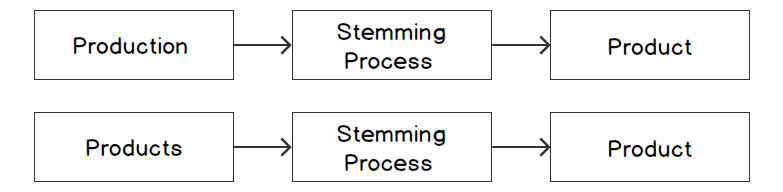


### **Exemplo 1.07 - *Stemming***

Neste exemplo, usaremos dois algoritmos, chamados de ***Porter stemmer*** e ***Snowball stemmer***, fornecidos pela biblioteca NLTK. O ***Porter stemmer*** é um algoritmo baseado em regras que transforma palavras em sua forma básica removendo sufixos de palavras. O ***Snowball stemmer*** é uma melhoria em relação ao anterior, pois é um pouco mais rápido e usa menos memória. No NLTK, isso é feito pelo método **`stem()`** fornecido pela classe `PorterStemmer`.

In [ ]:
from nltk import stem

In [ ]:
def get_stems(word,stemmer):
    return stemmer.stem(word)
porterStem = stem.PorterStemmer()

get_stems("production",porterStem)

'product'

In [ ]:
get_stems("coming",porterStem)

'come'

In [ ]:
get_stems("firing",porterStem)

'fire'

In [ ]:
get_stems("battling",porterStem)

'battl'

In [ ]:
stemmer = stem.SnowballStemmer("english")
get_stems("battling",stemmer)

'battl'

**Lematização (*Lemmatization*)**

---

Às vezes, o processo de *stemming* leva a resultados incorretos. 

Por exemplo, no último exercício, a palavra ***battling*** foi transformada em "*battl*", que não é uma palavra. Para superar esses problemas com *stemming*, usamos a lematização. 

A **lematização** é o processo de converter palavras em sua forma gramatical básica, como em "*battling*" em "*battle*", em vez de apenas de cortar palavras aleatoriamente. Nesse processo, uma verificação adicional é feita procurando em um **dicionário** para extrair a forma base de uma palavra.

### **Exemplo 1.08 - Lematização**

In [ ]:
from nltk import download
download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_lemma(word):
    return lemmatizer.lemmatize(word)

get_lemma('products')

'product'

In [ ]:
get_lemma('production')

'production'

In [ ]:
get_lemma('coming')

'coming'

**Reconhecimento de Entidades Nomeadas (*NER - Named Entity Recognition*)**

---

**Reconhecimento de Entidades Nomeadas** é o processo de extrair entidades importantes, como nomes de pessoas, nomes de lugares e nomes de organizações, de um determinado texto. 

Eles geralmente não estão presentes nos dicionários. Portanto, precisamos tratá-los de forma diferente. O principal objetivo desse processo é identificar as entidades nomeadas (como nomes próprios) e mapeá-las em categorias, que já estão definidas. Por exemplo, as categorias podem incluir nomes de pessoas, lugares e assim por diante.

O **Reconhecimento de Entidades Nomeadas** encontrou uso em muitas tarefas de PLN, incluindo atribuição de tags a artigos de notícias, algoritmos de pesquisa e muito mais. O **Reconhecimento de Entidades Nomeadas** pode analisar um artigo de notícias e extrair as principais pessoas, organizações e lugares discutidos nele e atribuí-los como marcas para novos artigos.

No caso de algoritmos de busca, vamos supor que tenhamos que criar um mecanismo de busca, voltado especificamente para livros. Se tivéssemos de enviar uma determinada consulta para todas as palavras, a pesquisa demoraria muito. Em vez disso, se extrairmos as entidades principais de todos os livros usando **Reconhecimento de Entidades Nomeadas** e executarmos uma consulta de pesquisa nas entidades em vez de em todo o conteúdo, a velocidade do sistema aumentará drasticamente.

**Chunking** é o processo de agrupar palavras em pedaços, que podem ser usados ​​posteriormente para encontrar grupos de substantivos e grupos de verbos, ou também para particionar frases.

### **Exemplo 1.09 - Reconhecimento de Entidades Nomeadas**

In [ ]:
from nltk import download
from nltk import pos_tag
from nltk import ne_chunk
from nltk import word_tokenize
download('maxent_ne_chunker')
download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
sentence = "We are reading a book published by Packt which is based out of Birmingham."

In [ ]:
def get_ner(text):
    i = ne_chunk(pos_tag(word_tokenize(text)), binary=True)
    return [a for a in i if len(a)==1]
    
get_ner(sentence)

[Tree('NE', [('Packt', 'NNP')]), Tree('NE', [('Birmingham', 'NNP')])]

**Desambiguação do sentido da palavra (*Word Sense Disambiguation*)**

---

O significado de uma palavra depende de sua associação com outras palavras em uma frase. Isso significa que duas ou mais palavras com a mesma grafia podem ter significados diferentes em diferentes contextos.

Isso geralmente leva à **ambigüidade**. A **desambiguação do sentido da palavra** é o processo de mapear uma palavra para o sentido que ela deve ter. Precisamos desambiguar as palavras com base no sentido que carregam, para que possam ser tratadas como entidades diferentes ao serem analisadas. A figura a seguir mostra um exemplo perfeito de como a ambigüidade é causada devido ao uso da mesma palavra em frases diferentes:


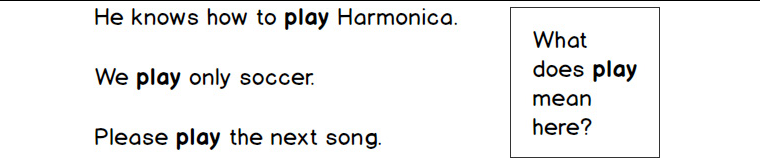

Um dos algoritmos para resolver a desambiguação do sentido da palavra é o algoritmo de **Lesk**. Possui um enorme corpus de fundo (geralmente é usado **WordNet**) que contém definições de todos os sinônimos possíveis de todas as palavras possíveis em um idioma. Em seguida, ele pega uma palavra e o contexto como entrada e encontra uma correspondência entre o contexto e todas as definições da palavra. O significado com o maior número de correspondências com o contexto da palavra será retornado.

Por exemplo, suponha que temos uma frase como "*We play only socce*" em um determinado texto. Agora, precisamos encontrar o significado da palavra "*play*" nesta frase. No algoritmo de Lesk, cada palavra com significado ambíguo é salva em *synsets*. Neste caso, a palavra "play" será salva com todas as definições possíveis. Digamos que temos duas definições para a palavra "*play*":

> **Jogar**: participar de um esporte ou jogo
> **Tocar**: usando um instrumento musical

Em seguida, encontraremos a similaridade entre o contexto da palavra "play" no texto e ambas as definições anteriores usando técnicas de similaridade de texto. A definição mais adequada ao contexto de "*play*" na frase será considerada o significado ou definição da palavra. Nesse caso, descobriremos que nossa primeira definição se encaixa melhor no contexto, pois as palavras "*sport*" e "*game*" estão presentes nas frases anteriores.

### **Exemplo 1.10 - Desambiguação do Sentido da Palavra**

In [ ]:
from nltk.wsd import lesk
from nltk import word_tokenize

In [ ]:
sentence1 = "Keep your savings in the bank"
sentence2 = "It's so risky to drive over the banks of the road"

In [ ]:
def get_synset(sentence, word):
    return lesk(word_tokenize(sentence), word)
    
get_synset(sentence1,'bank')

Synset('savings_bank.n.02')

In [ ]:
get_synset(sentence2,'bank')

Synset('bank.v.07')

In [ ]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bank'):
  print(ss, ss.definition())

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

**Detecção de Limites de Sentença (*Sentence Boundary Detection*)**

---

A **Detecção de Limites de Sentença** é o método de detectar onde uma sentença termina e outra começa. 

Se você está pensando que isso parece muito fácil, já que um ponto (.) ou um ponto de interrogação (?) denota o final de uma sentença e o início de outra, então você está errado. 

Também podem haver casos em que as letras das siglas são separadas por pontos, por exemplo. Várias análises precisam ser realizadas em um nível de sentença; detectar os limites das sentenças é essencial.

### **Exemplo 1.11 - Detecção de Limites de Sentença**

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
def get_sentences(text):
    return sent_tokenize(text)
    
get_sentences("We are reading a book. Do you know who is the publisher? It is Packt. Packt is based out of Birmingham.")

['We are reading a book.',
 'Do you know who is the publisher?',
 'It is Packt.',
 'Packt is based out of Birmingham.']

In [ ]:
get_sentences("Mr. Donald John Trump is the current president of the USA. Before joining politics, he was a businessman.")

['Mr.. Donald John Trump is the current president of the USA.',
 'Before joining politics, he was a businessman.']

Como você pode ver no código, o método **`sent_tokenize`** é capaz de diferenciar entre o ponto (.) após "Mr" e aquele usado para finalizar a frase.